In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv')

In [3]:
df.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
a_renomear = {
    'expected_hours': 'horas_esperadas',
    'price': 'preco',
    'unfinished': 'nao_finalizado'
}
df = df.rename(columns = a_renomear)

In [5]:
trocar = {
    0 : 1,
    1 : 0
}
df['finalizado'] = df.nao_finalizado.map(trocar)

In [6]:
df.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [7]:
df.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


In [8]:
import seaborn as sns

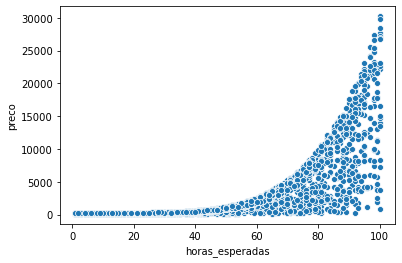

In [9]:
sns.scatterplot(x='horas_esperadas', y='preco', data=df);

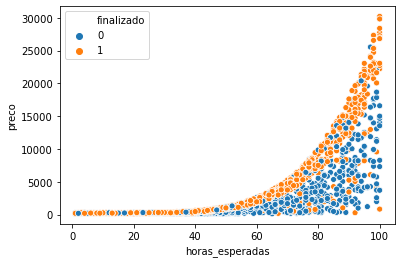

In [10]:
sns.scatterplot(x='horas_esperadas', y='preco', hue='finalizado',data=df);

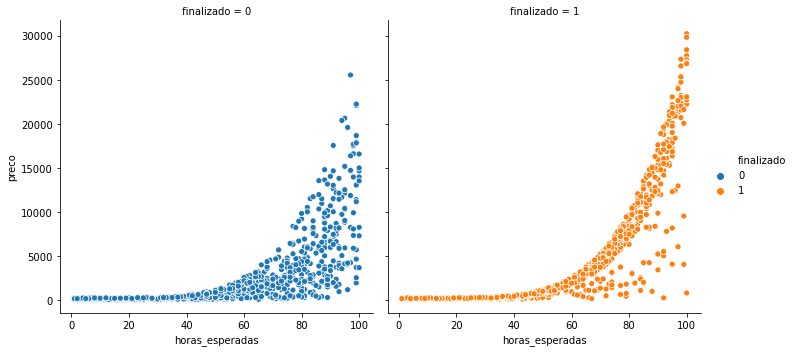

In [11]:
sns.relplot(x='horas_esperadas', y='preco', col='finalizado', hue='finalizado', data=df);

In [12]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [13]:
x = df[['horas_esperadas', 'preco']]
y = df['finalizado']

In [14]:
# Fixar a semente aleatória no numpy
np.random.seed(5)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify= y)

In [15]:
model = LinearSVC()
model.fit(train_x, train_y)

/home/phomint/anaconda3/envs/datascience/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [16]:
previsao = model.predict(test_x)

In [17]:
accuracy = accuracy_score(test_y, previsao)
accuracy

0.4925925925925926

## baseline

In [18]:
previsoes_base = np.ones(540)
accuracy_base = accuracy_score(test_y, previsoes_base)
accuracy_base

0.5259259259259259

# Entendendo onde erramos

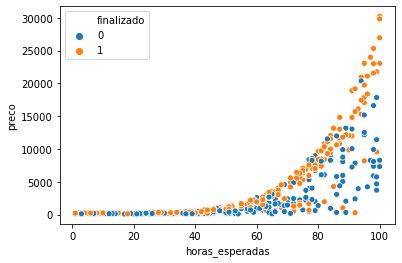

In [19]:
sns.scatterplot(x='horas_esperadas', y='preco', hue=test_y, data=test_x);

Treino e teste não aparentam estar diferentes

In [20]:
x_min = test_x.horas_esperadas.min()
x_max = test_x.horas_esperadas.max()
y_min = test_x.preco.min()
y_max = test_x.preco.max()

In [21]:
pixels = 100
eixo_x = np.arange(x_min, x_max, ((x_max-x_min)/ pixels))
eixo_y = np.arange(y_min, y_max, ((y_max-y_min)/ pixels))

In [22]:
xx, yy = np.meshgrid(eixo_x, eixo_y)

In [23]:
pontos = np.c_[xx.ravel(), yy.ravel()]

In [24]:
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [25]:
previsao_grid =  model.predict(pontos)

In [26]:
previsao_grid

array([0, 0, 0, ..., 1, 1, 1])

In [27]:
previsao_grid = previsao_grid.reshape(xx.shape)

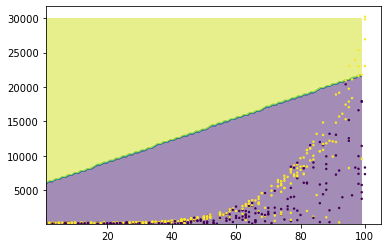

In [28]:
plt.contourf(xx, yy, previsao_grid, alpha=0.5)
plt.scatter(test_x.horas_esperadas, test_x.preco, c=test_y, s=2);

## Trocando modelo de treinamento

In [29]:
from sklearn.svm import SVC

In [30]:
model = SVC()
model.fit(train_x, train_y)

predict = model.predict(test_x)
accuracy = accuracy_score(test_y, predict)
print(accuracy)

0.5518518518518518


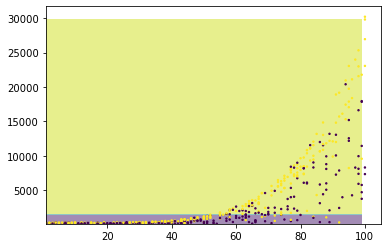

In [31]:
previsao_grid2 =  model.predict(pontos)
previsao_grid2 = previsao_grid2.reshape(xx.shape)

plt.contourf(xx, yy, previsao_grid2, alpha=0.5)
plt.scatter(test_x.horas_esperadas, test_x.preco, c=test_y, s=2);

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

model = SVC()
model.fit(train_x, train_y)

predict = model.predict(test_x)
accuracy = accuracy_score(test_y, predict)
print(accuracy)

0.6685185185185185


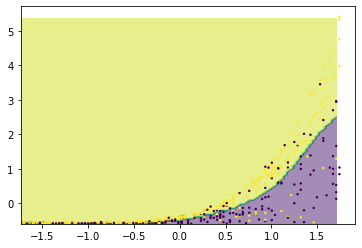

In [35]:
data_x = test_x[:, 0]
data_y = test_x[:, 1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

eixo_x = np.arange(x_min, x_max, ((x_max-x_min)/ pixels))
eixo_y = np.arange(y_min, y_max, ((y_max-y_min)/ pixels))

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

previsao_grid3 =  model.predict(pontos)
previsao_grid3 = previsao_grid3.reshape(xx.shape)

plt.contourf(xx, yy, previsao_grid3, alpha=0.5)
plt.scatter(data_x, data_y, c=test_y, s=2);